In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import print_function

import math
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from IPython import display
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd


import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
train_data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
test_data  = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv", sep=",")

In [0]:
train_data = train_data.reindex( np.random.permutation(train_data.index))

In [5]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [0]:
def pre_process_train_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  # Create a boolean categorical feature representing whether the
  # median_house_value is above a set threshold.
  labels["median_house_value_is_high"] = ( dataframe["median_house_value"] > 265000).astype(float)
  return train_test_split(processed_features, labels, test_size = 0.3,shuffle=True)

def pre_process_test_data(dataframe):
  features = dataframe.iloc[:,:-1]
  processed_features = features.copy()
  processed_features["rooms_per_person"] =  processed_features["total_rooms"] / processed_features["population"] 
  
  labels = pd.DataFrame()
  labels["median_house_value_is_high"] = ( dataframe["median_house_value"] > 265000).astype(float)
  return processed_features, labels  

In [0]:
X_train, X_val, y_train, y_val = pre_process_train_data(train_data)
X_test, y_test = pre_process_test_data(test_data)

In [9]:
display.display(X_train.describe())
display.display(X_val.describe())
display.display(y_train.describe())
display.display(y_val.describe())
display.display(X_test.describe())
display.display(y_test.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,-119.558637,35.621034,28.540168,2652.687059,542.004622,1434.400336,503.491092,3.875946,1.970045
std,1.998120,2.134845,12.638109,2173.883201,421.161076,1141.924149,383.970301,1.912060,0.940088
min,-124.350000,32.540000,1.000000,11.000000,3.000000,3.000000,3.000000,0.499900,0.018065
25%,-121.780000,33.930000,18.000000,1463.000000,298.000000,791.000000,282.000000,2.562500,1.521037
50%,-118.490000,34.250000,29.000000,2137.000000,436.000000,1171.000000,410.000000,3.537700,1.944996
75%,-118.010000,37.710000,37.000000,3167.000000,652.000000,1724.000000,607.000000,4.757025,2.293033
max,-114.560000,41.950000,52.000000,37937.000000,5471.000000,35682.000000,5189.000000,15.000100,27.092593


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000,5100.000000
mean,-119.570208,35.635004,28.704118,2622.611569,533.358627,1418.312353,495.927255,3.901387,2.006389
std,2.021687,2.143327,12.467196,2194.100568,422.267313,1161.603925,385.788189,1.899085,1.579222
min,-124.270000,32.550000,1.000000,2.000000,1.000000,6.000000,1.000000,0.499900,0.104410
25%,-121.800000,33.930000,18.000000,1454.750000,295.000000,783.000000,280.000000,2.574275,1.523101
50%,-118.490000,34.240000,29.000000,2108.500000,428.500000,1158.000000,404.000000,3.561400,1.931964
75%,-117.980000,37.730000,37.000000,3114.000000,639.000000,1713.250000,598.000000,4.781500,2.307996
max,-114.310000,41.860000,52.000000,32627.000000,6445.000000,28566.000000,6082.000000,15.000100,55.222222


,median_house_value_is_high
count,11900.000000
mean,0.248487
std,0.432154
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,median_house_value_is_high
count,5100.000000
mean,0.252941
std,0.434740
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,1.966320
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,1.099930
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,0.035955
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,1.513472
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,1.922678
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,2.294729
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,33.843373


,median_house_value_is_high
count,3000.000000
mean,0.248667
std,0.432312
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


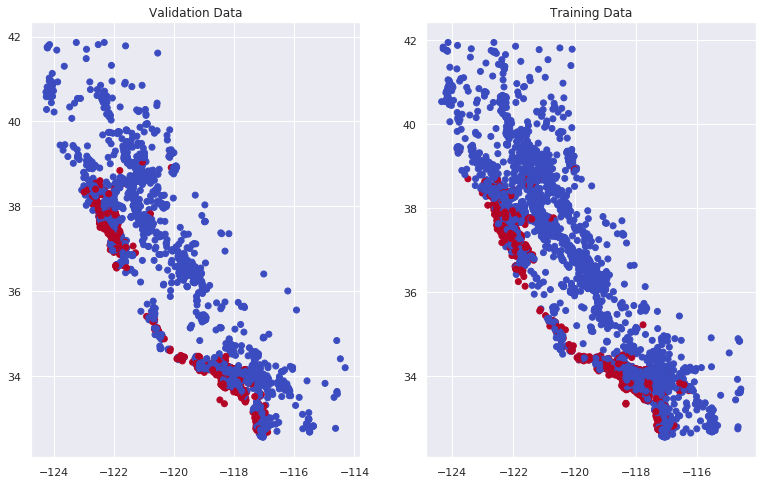

In [10]:
plt.figure(figsize=(13, 8))

ax = plt.subplot(1, 2, 1)
ax.set_title("Validation Data")
plt.scatter(X_val["longitude"], X_val["latitude"],
            cmap="coolwarm",
            c=y_val["median_house_value_is_high"])

ax = plt.subplot(1,2,2)
ax.set_title("Training Data")
plt.scatter(X_train["longitude"],
            X_train["latitude"],
            cmap="coolwarm",
            c=y_train["median_house_value_is_high"])
_ = plt.plot()

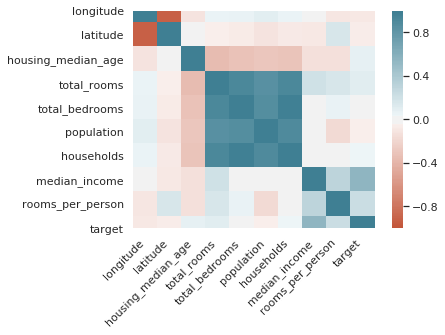

In [11]:
correlation_dataframe = X_train.copy()
correlation_dataframe["target"] = y_train["median_house_value_is_high"]

corr = correlation_dataframe.corr()
ax = sns.heatmap( corr, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(20, 220, n=200),
                  square=True )
ax.set_xticklabels( ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right' );

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True,count=None):
  ds = tf.data.Dataset.from_tensor_slices((dict(features),targets))
  ds = ds.batch(batch_size).repeat(count)
  if shuffle:
    ds = ds.shuffle(10000)
  return ds

In [0]:
def get_quantile_based_buckets(feature_values, num_buckets):
  quantiles = feature_values.quantile( [(i+1.)/(num_buckets + 1.) for i in range(num_buckets)])
  #print(quantiles, quantiles.keys())
  #for q in quantiles.keys():
    #print(q, quantiles[q])
  return [quantiles[q] for q in quantiles.keys()]

In [0]:
def construct_feature_columns():
  """Construct the TensorFlow Feature Columns.

  Returns:
    A set of feature columns
  """
  training_examples = X_train

  bucketized_households = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("households"), 
                                                               boundaries=get_quantile_based_buckets(training_examples["households"], 10))
  bucketized_longitude = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("longitude"),
                                                              boundaries=get_quantile_based_buckets(training_examples["longitude"], 50))
  bucketized_latitude = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("latitude"),
                                                             boundaries=get_quantile_based_buckets(training_examples["latitude"], 50))
  bucketized_housing_median_age = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("housing_median_age"),
                                                                       boundaries=get_quantile_based_buckets( training_examples["housing_median_age"], 10))
  bucketized_total_rooms = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("total_rooms"),
                                                                boundaries=get_quantile_based_buckets(training_examples["total_rooms"], 10))
  bucketized_total_bedrooms = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("total_bedrooms"), 
                                                                   boundaries=get_quantile_based_buckets(training_examples["total_bedrooms"], 10))
  bucketized_population = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("population"),
                                                               boundaries=get_quantile_based_buckets(training_examples["population"], 10))
  bucketized_median_income = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("median_income"),
                                                                  boundaries=get_quantile_based_buckets(training_examples["median_income"], 10))
  bucketized_rooms_per_person = tf.feature_column.bucketized_column( tf.feature_column.numeric_column("rooms_per_person"),
                                                                     boundaries=get_quantile_based_buckets( training_examples["rooms_per_person"], 10))

  long_x_lat = tf.feature_column.crossed_column( set([bucketized_longitude, bucketized_latitude]), hash_bucket_size=1000)

  feature_columns = set([ long_x_lat,
                          bucketized_longitude,
                          bucketized_latitude,
                          bucketized_housing_median_age,
                          bucketized_total_rooms,
                          bucketized_total_bedrooms,
                          bucketized_population,
                          bucketized_households,
                          bucketized_median_income,
                          bucketized_rooms_per_person])
  
  return feature_columns

In [0]:
def model_size(estimator):
  variables = estimator.get_variable_names()
  size = 0
  for variable in variables:
    if not any(x in variable 
               for x in ['global_step',
                         'centered_bias_weight',
                         'bias_weight',
                         'Ftrl']
              ):
      size += np.count_nonzero(estimator.get_variable_value(variable))
  return size

In [0]:
def train_model(learning_rate, regularization_strength, steps, batch_size, feature_columns, training_examples, training_targets, validation_examples, validation_targets):
  
  my_optimizer = tf.keras.optimizers.Ftrl(learning_rate=learning_rate, l1_regularization_strength=regularization_strength,clipnorm =5.0)
  linear_classifier = tf.estimator.LinearClassifier(feature_columns = feature_columns,optimizer = my_optimizer) 
  
  training_input_fn = lambda: my_input_fn(training_examples, training_targets["median_house_value_is_high"], batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn( training_examples, training_targets["median_house_value_is_high"], count=1, shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples,validation_targets["median_house_value_is_high"], count=1, shuffle=False)

  print("Training model...")
  #print("LogLoss (on validation data):")
  
  history = linear_classifier.train(input_fn=training_input_fn, steps=steps)
  print("Model training finished.")
  
  training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
  
  training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
  
  validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
  
  validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
  
  print("Computing training and validation loss...")
  training_log_loss = metrics.log_loss(training_targets, training_probabilities)
  validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)

  
  print("LogLoss (on training data): %0.3f" % training_log_loss)
  print("LogLoss (on validation data): %0.3f" % validation_log_loss)

  # Output a graph of loss metrics over periods.
  # plt.ylabel("RMSE")
  # plt.xlabel("Periods")
  # plt.title("Root Mean Squared Error vs. Periods")
  # plt.tight_layout()
  # plt.plot(training_rmse, label="training")
  # plt.plot(validation_rmse, label="validation")
  # plt.legend()

  return linear_classifier

In [17]:
linear_classifier = train_model(
    learning_rate=0.1,
    # TWEAK THE REGULARIZATION VALUE BELOW
    regularization_strength=0.0,
    steps=300,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=X_train,
    training_targets=y_train,
    validation_examples=X_val,
    validation_targets=y_val)
print("Model size:", model_size(linear_classifier))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxfuearxr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f48777f4a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
Instructions for updating:
If using Ke

In [18]:
linear_classifier = train_model(
    learning_rate=0.1,
    regularization_strength=0.9,
    steps=300,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=X_train,
    training_targets=y_train,
    validation_examples=X_val,
    validation_targets=y_val)
print("Model size:", model_size(linear_classifier))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmprs5amy7d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4873bd5b70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
INFO:tensorflow:Calling model_fn.

If 